In [17]:
#importing libraries and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

from scipy.fftpack import fft #library used for fast fourier transform 

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

In [18]:
df.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 12:00:00,778.058,0.0,736.961,0.0,153.76537,0.0,1591.658,255.05000,44.0,7.056667,...,0.0,1.276400,12.450000,13.983334,7.000000,68.833336,29966.666,10.833333,P01S01W8655,NaN
2017-04-24 13:00:00,778.207,0.0,736.961,0.0,148.48604,0.0,1591.658,252.86667,58.0,6.928333,...,0.0,0.513033,12.766666,13.850000,6.533333,65.333336,36050.000,32.666668,P01S01W8655,0.0
2017-04-24 14:00:00,778.418,0.0,736.961,0.0,214.16338,0.0,1591.658,259.85000,0.0,7.096667,...,0.0,1.507850,12.800000,14.266666,6.483334,65.000000,40366.668,5.500000,P01S01W8655,0.0
2017-04-24 15:00:00,778.570,0.0,736.961,0.0,151.11765,0.0,1591.658,263.51666,0.0,6.660000,...,0.0,0.000000,12.400000,13.633333,6.600000,67.333336,34000.000,2.000000,P01S01W8655,0.0
2017-04-24 16:00:00,778.750,0.0,736.961,0.0,180.75978,0.0,1591.658,252.88333,0.0,6.373334,...,0.0,0.130250,12.150000,13.033333,6.416666,67.333336,35150.000,2.000000,P01S01W8655,0.0


In [19]:
#Resampling the imported data to a specified resolution (line 3) to train on different time frames. 

sample_rate = '1h' #Sets the resolution of the data using downsampling.Can be 1h, 3h, 1d, 7d etc.
def resample_df(df,sample_rate):
    
    input_df = df
    to_last = ['gasMeter','eMeter']
    input_df[to_last] = input_df[to_last].resample(sample_rate).last()
    input_df = input_df.resample(sample_rate).mean()
    
    return(input_df)

rdf=resample_df(df,sample_rate) #downsamples data from hourly resolution to specified resolution in line 3.

In [20]:
#Create new pandas series for fourier transform with selected range of data

time = rdf.index[700:868] 
gas = rdf['gasPower'][700:868] 
temp = rdf['T'][700:868]  


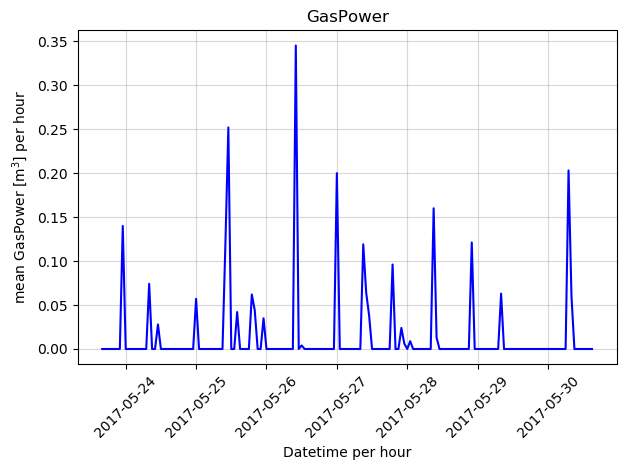

In [25]:
#Visualize selected range of gasPower and time

plt.title('GasPower')

plt.plot(time,gas, '-', color='b', ms=10)
plt.ylabel('mean GasPower [m$^3$] per hour')
plt.xlabel('Datetime per hour')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()

plt.savefig('hourbooleans.png', dpi=700)

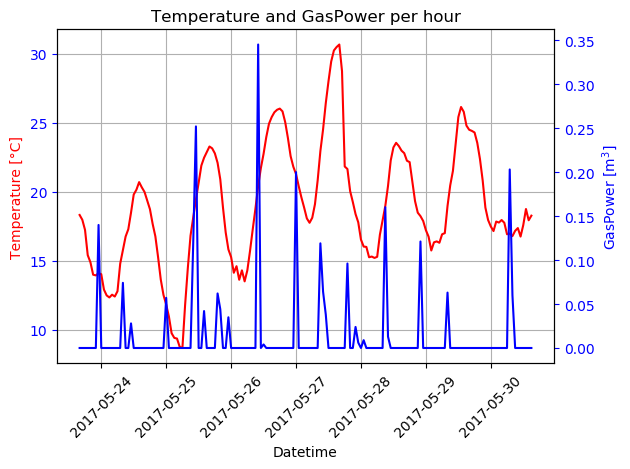

<Figure size 640x480 with 0 Axes>

In [27]:
#Visualize selected range of gasPower, Temperature and time. 

fig, ax1 = plt.subplots()
ax1.plot(time, temp, 'r-')
plt.title('Temperature and GasPower per hour')
ax1.set_xlabel('Datetime')
plt.xticks(rotation=45)
ax1.set_ylabel('Temperature [°C]', color='r')
ax1.tick_params('y', colors='b')
plt.grid()
fig.tight_layout()

ax2 = ax1.twinx()
ax2.plot(time,gas, 'b-')
ax2.set_ylabel('GasPower [m$^3$]', color='b')
ax2.tick_params('y', colors='b')
fig.tight_layout()

plt.show()
plt.savefig('humanpatterns.png', dpi=1200)

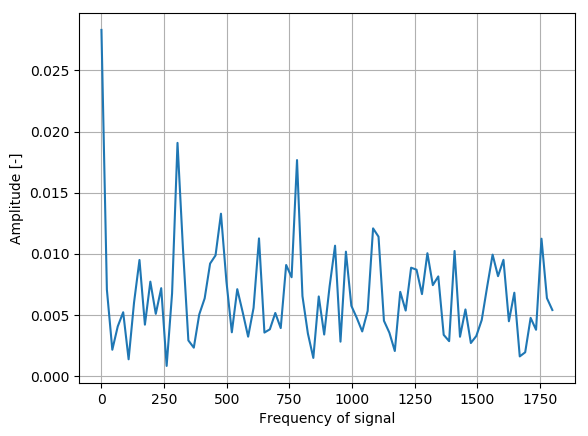

In [23]:
#https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
N = len(gas) #number of sample points
T = 1.0 / 3600 #sample interval
yf = fft(gas) #fast fourier transform on gas data
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.ylabel('Amplitude [-]')
plt.xlabel('Frequency of signal')
plt.show()